<center><h1>Lab work on linear regression</h1></center>

## Part 1

In [44]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as lm


In [ ]:
# Load the data and visualize the first 5 rows

data = pd.read_csv('invest.csv')

data.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


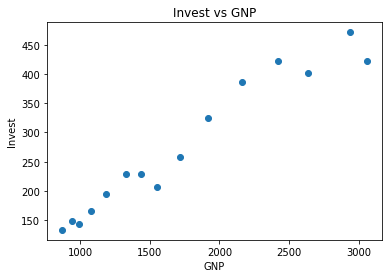

In [ ]:
# Visualize the data

Invest = data['invest']
GNP = data['gnp']

plt.scatter(GNP, Invest)
plt.xlabel('GNP')
plt.ylabel('Invest')
plt.title('Invest vs GNP')
plt.show()


In [10]:
# Applying log to columns GNP and Invest

data['log_GNP'] = np.log(data['gnp'])
data['log_Invest'] = np.log(data['invest'])

data.head()

,year,gnp,invest,cpi,interest,log_GNP,log_Invest
0,1968,873.4,133.3,82.54,5.16,6.772394,4.892602
1,1969,944.0,149.3,86.79,5.87,6.850126,5.005958
2,1970,992.7,144.2,91.45,5.95,6.900429,4.971201
3,1971,1077.6,166.4,96.01,4.88,6.982492,5.114395
4,1972,1185.9,195.0,100.00,4.50,7.078257,5.273000


Beta 0: -1.9635913352301815
Beta 1: 1.0152814015988707


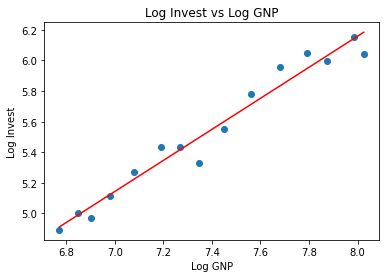

In [16]:
# Estimating slope and intercept

Invest_log_mean = data['log_Invest'].mean()

GNP_log_mean = data['log_GNP'].mean()

centered_x = data['log_GNP'] - GNP_log_mean
centered_y = data['log_Invest'] - Invest_log_mean

y_var = np.sum(centered_x * centered_y)
x_var = np.sum(centered_x ** 2)

beta_1_estimator = y_var / x_var

beta_0_estimator = Invest_log_mean - beta_1_estimator * GNP_log_mean

print('Beta 0:', beta_0_estimator)
print('Beta 1:', beta_1_estimator)

plt.scatter(data['log_GNP'], data['log_Invest'])
plt.plot(data['log_GNP'], beta_0_estimator + beta_1_estimator * data['log_GNP'], color='red')
plt.xlabel('Log GNP')
plt.ylabel('Log Invest')
plt.title('Log Invest vs Log GNP')
plt.show()

In [18]:
# Estimating std 

var_estimator = np.sum((data['log_Invest'] - (beta_0_estimator + beta_1_estimator * data['log_GNP'])) ** 2) / (len(data) - 2)

print('Standard Deviation:', var_estimator)

beta_0_std = np.sqrt(var_estimator * (1 / len(data) + GNP_log_mean ** 2 / x_var))

beta_1_std = np.sqrt(var_estimator / x_var)

print('Beta 0 std:', beta_0_std)
print('Beta 1 std:', beta_1_std)

Standard Deviation: 0.007676338555460403
Beta 0 std: 0.16772896772604054
Beta 1 std: 0.05538306035485282


In [23]:
# Testing significance of the slope with alpha = 5%

test_statistic = beta_1_estimator / beta_1_std

print('Test Statistic:', test_statistic)

print(len(data))

t = 2.16

flag = test_statistic < t and test_statistic > -t

if not flag:
    print('Reject Null Hypothesis')
else:
    print('Fail to Reject Null Hypothesis')



Test Statistic: 18.33198445686667
15
Reject Null Hypothesis


In [29]:
# get p-value

p_value = 2 * (1 - stats.t.cdf(test_statistic, len(data) - 2))

print('P-value:', p_value)

P-value: 1.1363709973011282e-10


In [30]:
# Predict Invest for GNP = 1000

Invest_1000 = np.exp(beta_0_estimator + beta_1_estimator * np.log(1000))

print("Investment for GNP = 1000:", Invest_1000)

Investment for GNP = 1000: 155.9794279310548


In [32]:
# CI for Invest for GNP = 1000 at 90%

t = 1.771

CI = [beta_0_estimator + beta_1_estimator * np.log(1000) - t * np.sqrt(var_estimator) * np.sqrt(1 / len(data) + (np.log(1000) - GNP_log_mean) ** 2 / x_var),
      beta_0_estimator + beta_1_estimator * np.log(1000) + t * np.sqrt(var_estimator) * np.sqrt(1 / len(data) + (np.log(1000) - GNP_log_mean) ** 2 / x_var)]

print( "CI for GNP = 1000:", CI)

CI for GNP = 1000: [4.988220532935454, 5.111227719698148]


In [33]:
# PI for Invest for GNP = 1000 at 90%

t = 1.771

PI = [beta_0_estimator + beta_1_estimator * np.log(1000) - t * np.sqrt(var_estimator) * np.sqrt(1 + 1 / len(data) + (np.log(1000) - GNP_log_mean) ** 2 / x_var),
    beta_0_estimator + beta_1_estimator * np.log(1000) + t * np.sqrt(var_estimator) * np.sqrt(1 + 1 / len(data) + (np.log(1000) - GNP_log_mean) ** 2 / x_var)]

print("PI for GNP = 1000:", PI)

PI for GNP = 1000: [4.882813746249997, 5.216634506383604]


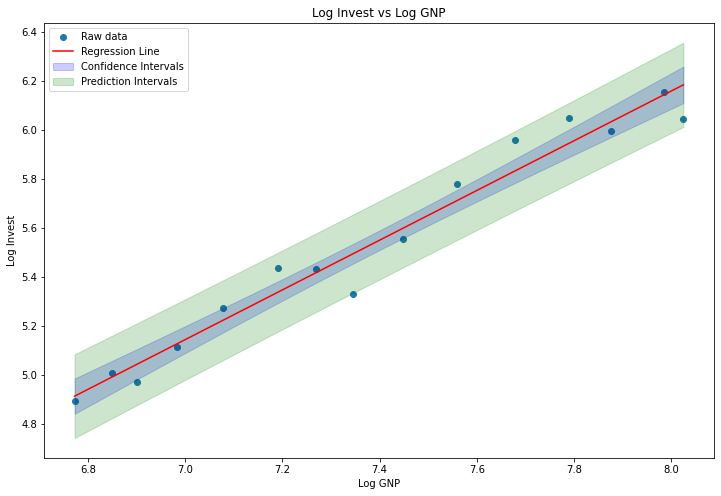

In [43]:
# visualize the data

GNP_range = np.linspace(min(data['log_GNP']), max(data['log_GNP']), 100)
confidence_intervals = [beta_0_estimator + beta_1_estimator * GNP_range - t * np.sqrt(var_estimator) * np.sqrt(1 / len(data) + (GNP_range - GNP_log_mean) ** 2 / x_var),
                        beta_0_estimator + beta_1_estimator * GNP_range + t * np.sqrt(var_estimator) * np.sqrt(1 / len(data) + (GNP_range - GNP_log_mean) ** 2 / x_var)]
prediction_intervals = [beta_0_estimator + beta_1_estimator * GNP_range - t * np.sqrt(var_estimator) * np.sqrt(1 + 1 / len(data) + (GNP_range - GNP_log_mean) ** 2 / x_var),
                        beta_0_estimator + beta_1_estimator * GNP_range + t * np.sqrt(var_estimator) * np.sqrt(1 + 1 / len(data) + (GNP_range - GNP_log_mean) ** 2 / x_var)]


plt.figure(figsize=(12, 8))
plt.scatter(data['log_GNP'], data['log_Invest'])
plt.plot(data['log_GNP'], beta_0_estimator + beta_1_estimator * data['log_GNP'], color='red')
plt.xlabel('Log GNP')
plt.ylabel('Log Invest')
plt.fill_between(GNP_range,confidence_intervals[0],confidence_intervals[1], color='blue', alpha=0.2)
plt.fill_between(GNP_range,prediction_intervals[0],prediction_intervals[1], color='green', alpha=0.2)
plt.title('Log Invest vs Log GNP')
plt.legend(['Raw data','Regression Line', 'Confidence Intervals', 'Prediction Intervals'])


plt.show()


In [48]:
# Using sklearn

X = data['log_GNP'].values.reshape(-1, 1)
y = data['log_Invest'].values.reshape(-1, 1)

reg = lm.LinearRegression().fit(X, y)


Beta0 = reg.intercept_[0]
Beta1 = reg.coef_[0,0]

print('Beta 0:', Beta0)
print('Beta 1:', Beta1)

Beta 0: -1.9635913352301815
Beta 1: 1.015281401598871


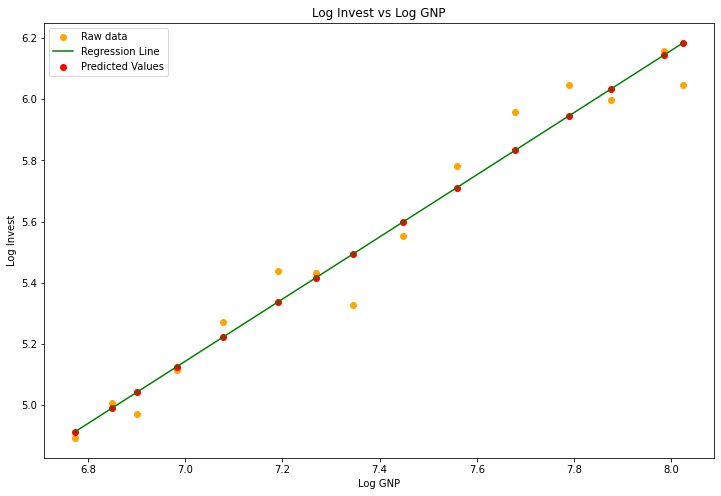

In [54]:
# visualize the data

plt.figure(figsize=(12, 8))
plt.scatter(X, y, color="orange")
plt.plot(X, reg.predict(X), color='green')
plt.scatter(X, reg.predict(X), color='red')
plt.xlabel('Log GNP')
plt.ylabel('Log Invest')
plt.title('Log Invest vs Log GNP')
plt.legend(['Raw data','Regression Line', 'Predicted Values'])
plt.show()


## Part 2

In [79]:
# Computing of Gram matrix
n = len(data)

X = np.zeros((n, 3))

X[:, 0] = 1
X[:, 1] = data['log_GNP']
X[:, 2] = data['interest']

Gram_matrix = np.dot(X.T, X)/n

print("Gram Matrix:\n", Gram_matrix)


Gram Matrix:
 [[ 1.          7.38352141  7.45266667]
 [ 7.38352141 54.68323179 55.94590287]
 [ 7.45266667 55.94590287 62.92371333]]


In [80]:
eigenvalues, eigenvectors = np.linalg.eig(Gram_matrix)

print("Eigenvalues:", eigenvalues)

Eigenvalues: [1.15858127e+02 1.21579798e-03 2.74760242e+00]


Note that there is no null eigenvalue, which means our matrix is full rank

In [81]:
# estimate coefficients


tetha = np.linalg.inv(n*Gram_matrix) @ X.T @ y

beta0_estimator = tetha[0, 0]
beta_1_estimator = tetha[1, 0]
beta_2_estimator = tetha[2, 0]

print('Beta 0:', beta0_estimator)
print('Beta 1:', beta_1_estimator)
print('Beta 2:', beta_2_estimator)

Beta 0: -2.1804547259139397
Beta 1: 1.0512426913200048
Beta 2: -0.006528879406112353
